<a href="https://colab.research.google.com/github/1112Suruchi/CODSOFT/blob/main/Creadit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.shape

(15936, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
df.duplicated().sum()

53

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df['Class'].value_counts()

Class
0.0    15809
1.0       73
Name: count, dtype: int64

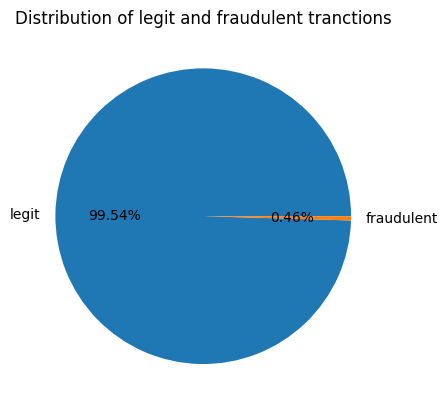

In [10]:
df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

In [11]:
fraud = df[df['Class']==1]
legit = df[df['Class']==0]

In [12]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15930,27368,-0.711494,0.785312,1.918214,-0.319681,0.113449,-1.279736,0.728519,-0.114506,-0.511745,...,-0.138591,-0.555546,-0.005721,0.687330,-0.210935,-0.067870,0.032099,0.111371,1.29,0.0
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,...,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,52.90,0.0
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,...,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,99.99,0.0
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,...,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,74.58,0.0


In [13]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15566,26961,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,...,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99,1.0
15736,27163,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,99.99,1.0
15751,27187,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,...,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,99.99,1.0
15781,27219,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1.0


In [14]:
legit.Amount.describe()

count    15809.000000
mean        66.418262
std        189.183729
min          0.000000
25%          5.560000
50%         15.950000
75%         53.900000
max       7712.430000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count      73.000000
mean       90.307123
std       271.634360
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [16]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,12120.694984,-0.216523,0.247419,0.863265,0.270208,-0.105488,0.122297,-0.111515,-0.014889,0.878297,...,0.028850,-0.066207,-0.160538,-0.035370,0.013893,0.116964,0.037922,0.012361,0.005982,66.418262
1.0,15559.643836,-7.929807,6.193120,-11.997831,6.555050,-5.474984,-2.480356,-8.354317,3.668478,-3.086988,...,0.671905,0.441100,-0.295856,-0.358994,-0.328925,0.216076,0.209323,0.927187,0.061380,90.307123


In [17]:
legit_sample = legit.sample(n=473)

In [18]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [19]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4402,3767,1.449960,-0.603512,-0.886886,-1.636774,1.483087,3.265692,-1.203769,0.716886,0.363072,...,-0.293357,-0.884978,0.103422,0.918730,0.366269,-0.505698,-0.015176,0.011059,16.80,0.0
11383,19860,1.098367,-0.448076,0.999437,-0.723335,-0.752332,0.483083,-0.938012,0.332178,2.899159,...,-0.053174,0.332987,0.019317,-0.334589,0.281615,-0.683119,0.091564,0.012927,11.85,0.0
5793,6217,1.338912,0.689267,-0.290811,1.103417,0.635634,-0.642557,0.535783,-0.462001,0.857157,...,-0.186557,-0.161402,-0.254573,-0.470903,0.987039,-0.287043,-0.026841,-0.001069,2.09,0.0
5558,5673,1.065409,-0.035064,1.079510,1.653371,-0.473776,0.638355,-0.606653,0.267067,1.978375,...,-0.186191,0.007154,-0.071532,-0.034577,0.539809,-0.312370,0.037790,0.005940,15.00,0.0
13616,24119,-9.594077,-10.922547,3.374856,2.503224,10.951324,-7.130336,-8.177309,-0.475428,3.564043,...,-1.305676,0.054526,-3.872989,0.494918,-0.486716,0.532787,1.712357,-1.353326,17.00,0.0


In [20]:
new_df.shape

(546, 31)

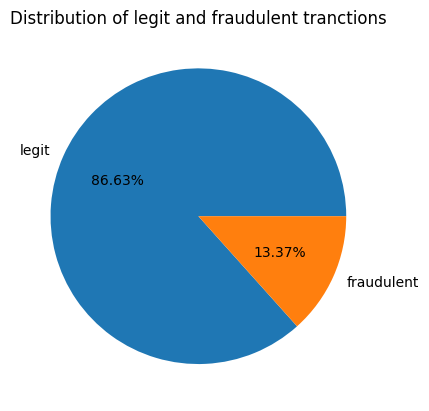

In [21]:
new_df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

In [22]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,12120.694984,-0.216523,0.247419,0.863265,0.270208,-0.105488,0.122297,-0.111515,-0.014889,0.878297,...,0.028850,-0.066207,-0.160538,-0.035370,0.013893,0.116964,0.037922,0.012361,0.005982,66.418262
1.0,15559.643836,-7.929807,6.193120,-11.997831,6.555050,-5.474984,-2.480356,-8.354317,3.668478,-3.086988,...,0.671905,0.441100,-0.295856,-0.358994,-0.328925,0.216076,0.209323,0.927187,0.061380,90.307123


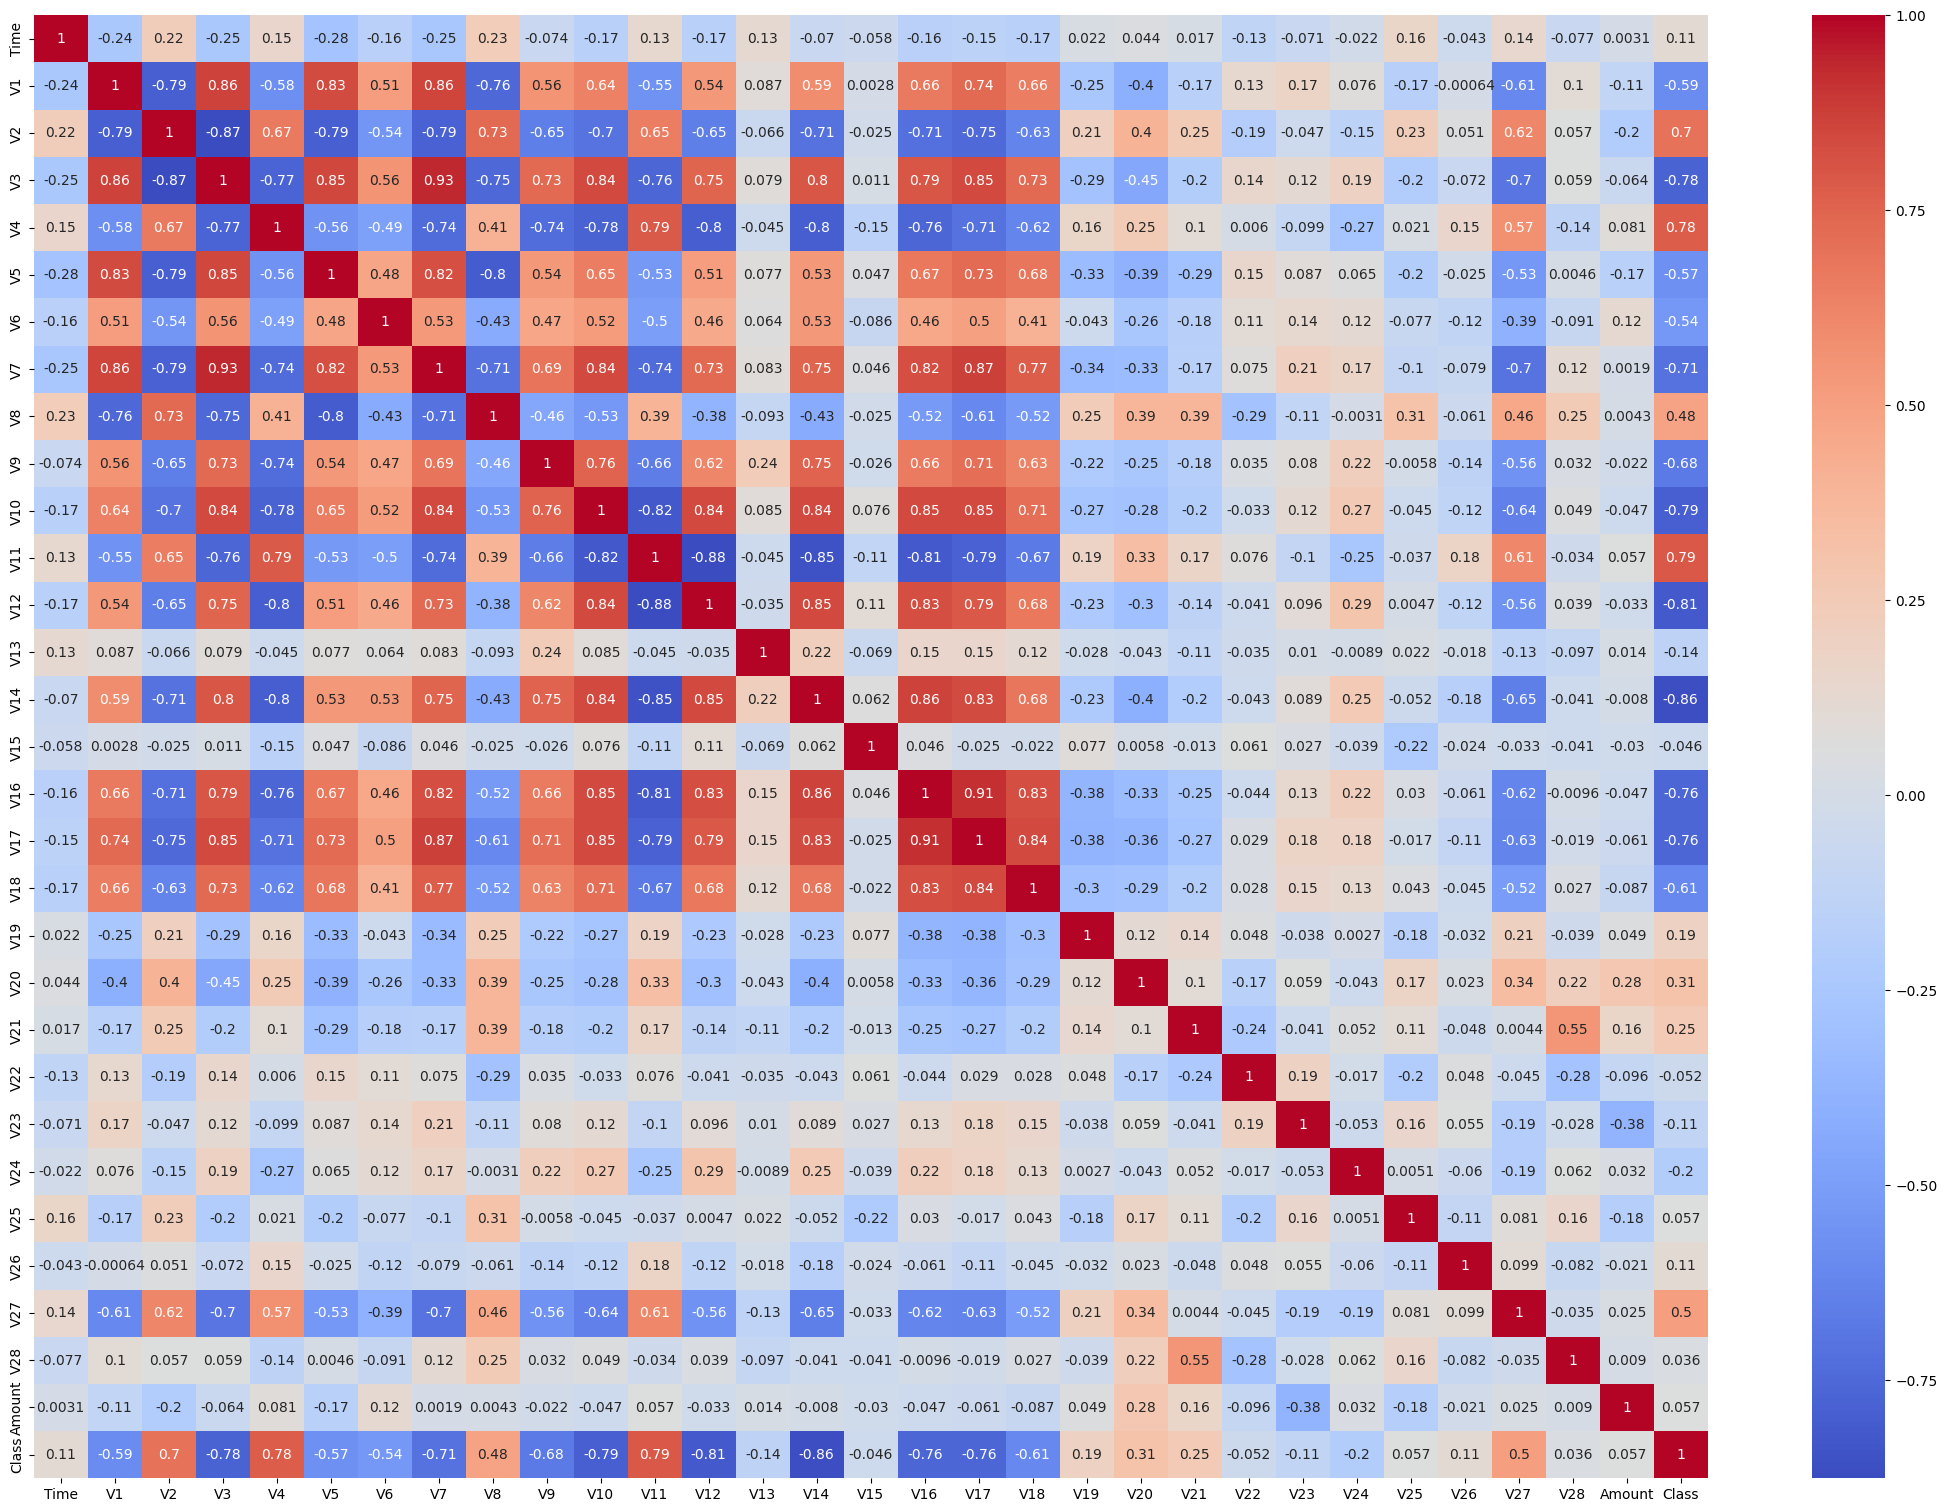

In [23]:
plt.figure(figsize=(27,19))
sns.heatmap(new_df.corr(), cmap = 'coolwarm', annot= True )
plt.show()

In [24]:
x = new_df.drop(columns='Class',axis=1)
y = new_df['Class']

In [25]:
y

4402     0.0
11383    0.0
5793     0.0
5558     0.0
13616    0.0
        ... 
15566    1.0
15736    1.0
15751    1.0
15781    1.0
15810    1.0
Name: Class, Length: 546, dtype: float64

In [26]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
4402,3767,1.449960,-0.603512,-0.886886,-1.636774,1.483087,3.265692,-1.203769,0.716886,0.363072,...,0.170814,-0.293357,-0.884978,0.103422,0.918730,0.366269,-0.505698,-0.015176,0.011059,16.80
11383,19860,1.098367,-0.448076,0.999437,-0.723335,-0.752332,0.483083,-0.938012,0.332178,2.899159,...,-0.226129,-0.053174,0.332987,0.019317,-0.334589,0.281615,-0.683119,0.091564,0.012927,11.85
5793,6217,1.338912,0.689267,-0.290811,1.103417,0.635634,-0.642557,0.535783,-0.462001,0.857157,...,-0.083433,-0.186557,-0.161402,-0.254573,-0.470903,0.987039,-0.287043,-0.026841,-0.001069,2.09
5558,5673,1.065409,-0.035064,1.079510,1.653371,-0.473776,0.638355,-0.606653,0.267067,1.978375,...,-0.253595,-0.186191,0.007154,-0.071532,-0.034577,0.539809,-0.312370,0.037790,0.005940,15.00
13616,24119,-9.594077,-10.922547,3.374856,2.503224,10.951324,-7.130336,-8.177309,-0.475428,3.564043,...,-3.894969,-1.305676,0.054526,-3.872989,0.494918,-0.486716,0.532787,1.712357,-1.353326,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15566,26961,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,...,1.630787,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99
15736,27163,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,...,1.640037,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,99.99
15751,27187,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,...,1.649202,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,99.99
15781,27219,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99


In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,stratify=y,random_state=15)

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [29]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
y_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train_pred,y_train)
print("Accuracy of training data:", training_data_accuracy*100,"%")

Accuracy of training data: 98.85321100917432 %


In [32]:
y_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test_pred,y_test)
print("Accuracy of test data:",test_data_accuracy*100,"%")

Accuracy of test data: 99.0909090909091 %


<ipython-input-33-390720c473f9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[training_data_accuracy*100,test_data_accuracy*100],x=['Train data accuracy','Test data accuracy'],palette='pastel')


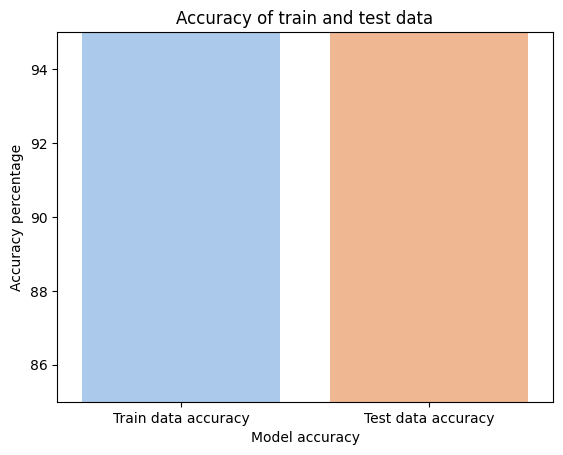

In [33]:
sns.barplot(y=[training_data_accuracy*100,test_data_accuracy*100],x=['Train data accuracy','Test data accuracy'],palette='pastel')
plt.title("Accuracy of train and test data")
plt.ylim(85,95)
plt.xlabel("Model accuracy")
plt.ylabel("Accuracy percentage")
plt.show()

In [34]:
print(confusion_matrix(y_test,y_test_pred))

[[95  0]
 [ 1 14]]


In [35]:
print("Classification report:\n",classification_report(y_test,y_test_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        95
         1.0       1.00      0.93      0.97        15

    accuracy                           0.99       110
   macro avg       0.99      0.97      0.98       110
weighted avg       0.99      0.99      0.99       110

